<a href="https://colab.research.google.com/github/MS-H2020/Open/blob/main/Anomaly_Sound_Detection_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[機械稼働音の異常検知](https://signate.jp/competitions/358)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
checkpoint_path = "./cp.ckpt"

## Unpack Zip file in which Melspectram images are.

In [ ]:
import os
import shutil
if os.path.isdir('./train_img'):
  shutil.rmtree('./train_img')
if os.path.isdir('./test_img'):
  shutil.rmtree('./test_img')

In [ ]:
!cp "/content/drive/MyDrive/Detect_Anormaly_Machines_by_Sound/01_input.zip" .

In [ ]:
import shutil
shutil.unpack_archive('/content/01_input.zip', '.')

## Import modules

In [ ]:
from typing import Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras import models, datasets, layers, applications, optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Generating Image

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, # 255で割ることで正規化
                                   zoom_range=0.2, # ランダムにズーム
                                   horizontal_flip = True, # 水平反転
                                   height_shift_range=0.1,
                                   validation_split = 0.2,
                                  )

In [ ]:
IMG_WIDTH = 320
IMG_HEIGHT = 240
IMG_DEPTH = 3

BATCH_SIZE = 32
train_dir = './train_img'
train_generator = datagen.flow_from_directory(train_dir, target_size=(IMG_WIDTH, IMG_HEIGHT), batch_size=BATCH_SIZE, class_mode='binary', shuffle=True, subset='training')
valid_generator = datagen.flow_from_directory(train_dir, target_size=(IMG_WIDTH, IMG_HEIGHT), batch_size=BATCH_SIZE, class_mode='binary', subset='validation')

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'anomaly': 0, 'normal': 1}

## CNN Model

In [ ]:
base_model = applications.mobilenet.MobileNet(weights='imagenet',
                                         include_top=False,
                                         input_shape=(IMG_WIDTH, IMG_HEIGHT, IMG_DEPTH)
                                        )

<ipython-input-9-7a7efc9f736e>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = applications.mobilenet.MobileNet(weights='imagenet',


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
epochs:int = 50 # Defalut:50
lr:float = 0.001 # Default:0.001

model = models.Sequential([
  base_model,
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(512, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

adam_low_rate = optimizers.Adam(learning_rate=lr)

# モデルを構築
model.compile(optimizer=adam_low_rate,
              loss="binary_crossentropy",
              metrics=['accuracy'])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 195s 14s/step - accuracy: 0.7708 - loss: 6.9058 - val_accuracy: 0.9167 - val_loss: 9.9638
Epoch 2/50
 1/12 ━━━━━━━━━━━━━━━━━━━━ 2:26 13s/step - accuracy: 0.9062 - loss: 4.0490

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9062 - loss: 4.0490 - val_accuracy: 0.5000 - val_loss: 70.5144
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 181s 13s/step - accuracy: 0.8816 - loss: 1.7567 - val_accuracy: 0.8958 - val_loss: 14.3794
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9062 - loss: 0.2844 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 181s 14s/step - accuracy: 0.9086 - loss: 0.2767 - val_accuracy: 0.9062 - val_loss: 7.5269
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8750 - loss: 0.1365 - val_accuracy: 0.7500 - val_loss: 20.9280
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 182s 14s/step - accuracy: 0.9713 - loss: 0.1284 - val_accuracy: 0.9062 - val_loss: 2.8557
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 1.0000 - loss: 0.0345 - val_accuracy: 0.7500 - val_loss: 8.5419
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 170s 14s/step - accuracy: 0.9767 - loss: 0.0975 - val_accuracy: 0.8958 - v

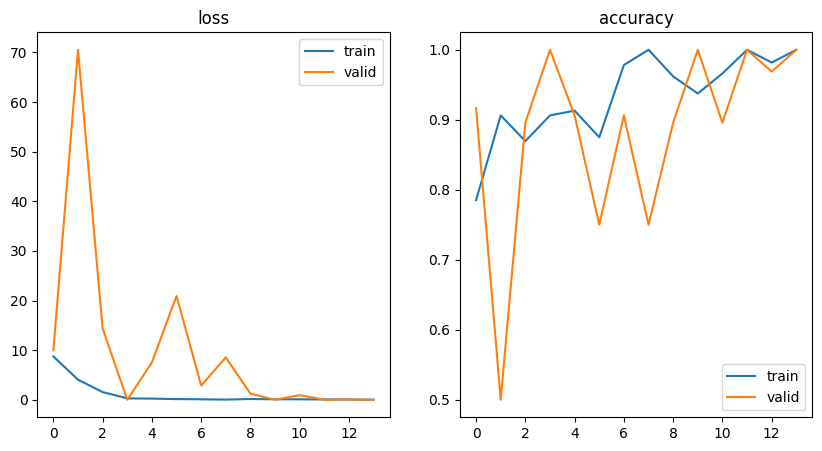

In [ ]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    steps_per_epoch = train_generator.samples // BATCH_SIZE,
                    validation_steps = valid_generator.samples // BATCH_SIZE,
                    verbose=True,
                    callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)],
                    epochs = epochs,
)


# 評価する。
test_loss, test_acc = model.evaluate(valid_generator)
model.save('model.h5')

plt.figure(figsize=(10, 5))  # グラフを表示するスペースを用意
metrics = ['loss', 'accuracy']  # 使用する評価関数を指定

for i in range(len(metrics)):
  metric = metrics[i]

  plt.subplot(1, 2, i+1)  # figureを1×2のスペースに分ける
  plt.title(metric)

  plt_train = history.history[metric]
  plt_valid  = history.history['val_' + metric]

  plt.plot(plt_train, label='train')
  plt.plot(plt_valid, label='valid')
  plt.legend()

plt.savefig("./metrics.png")

## To Output Submitting CSV

In [ ]:
ans = pd.read_csv("/content/drive/MyDrive/Detect_Anormaly_Machines_by_Sound/sample_submit.csv",  header=None)

In [ ]:
ans

,0,1
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
195,195,0
196,196,0
197,197,0
198,198,0


In [ ]:
#!cp './model.h5' '/content/drive/MyDrive/Detect_Anormaly_Machines_by_Sound/model.h5'
#!cp '/content/drive/MyDrive/Detect_Anormaly_Machines_by_Sound/model.h5' './model.h5'

In [ ]:
TEST_DIR = "./test_img"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(TEST_DIR, target_size=(IMG_WIDTH,IMG_HEIGHT), class_mode=None, shuffle=False)

Found 200 images belonging to 1 classes.


In [ ]:
pred = model.predict(test_generator)
pred = np.where(pred < 0.5, 0, 1)
# 0:正常音、1:異常音となるように出力値を反転させる

7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


In [ ]:
ans[1] = pred
ans.to_csv(path_or_buf = "/content/drive/MyDrive/Detect_Anormaly_Machines_by_Sound/submission_.csv", index=False, header=None)